In [1]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

In [2]:
text = "In 2021, doctors prevented the spread of the virus by vaccinating with Pfizer."

In [3]:
dimension_list = ["mainstream", "conspiracy", "positive", "negative"]

In [4]:
res = model.encode([text] + dimension_list, output_value="token_embeddings")
res

[tensor([[-0.0406,  0.0765, -0.0085,  ...,  0.0191,  0.0851, -0.0820],
         [ 0.0099,  0.1918, -0.0870,  ..., -0.0422,  0.1411, -0.0616],
         [ 0.0872,  0.0083, -0.0668,  ..., -0.0054,  0.2102, -0.0625],
         ...,
         [ 0.0727,  0.2039,  0.0037,  ...,  0.0149,  0.0846, -0.0729],
         [-0.0897,  0.0383,  0.0061,  ...,  0.0129, -0.0077, -0.0649],
         [-0.0907,  0.0472, -0.0188,  ..., -0.0140,  0.0412, -0.0498]]),
 tensor([[ 0.0050, -0.3508,  0.0392,  ...,  0.1221, -0.1002,  0.0341],
         [ 0.0058,  0.0619,  0.0457,  ...,  0.1278, -0.0495,  0.0365],
         [ 0.0239, -0.2290,  0.0269,  ...,  0.1156, -0.2044, -0.0090]]),
 tensor([[-0.0149, -0.1042, -0.0427,  ...,  0.1507, -0.1317, -0.0041],
         [-0.0282,  0.3626, -0.0480,  ...,  0.3031, -0.1411,  0.1132],
         [ 0.0034, -0.1029,  0.0107,  ...,  0.1311, -0.1360,  0.0146]]),
 tensor([[-0.0025, -0.2127, -0.0159,  ..., -0.0857,  0.0308, -0.0293],
         [ 0.0024,  0.2938, -0.0739,  ...,  0.0435, -0.16

In [5]:
token_ids = model.tokenizer.encode(text)
token_words = model.tokenizer.convert_ids_to_tokens(token_ids[1:-1])
len(token_ids), len(token_words), token_words

(22,
 20,
 ['in',
  '2021',
  ',',
  'doctors',
  'prevented',
  'the',
  'spread',
  'of',
  'the',
  'virus',
  'by',
  'va',
  '##cci',
  '##nat',
  '##ing',
  'with',
  'p',
  '##fi',
  '##zer',
  '.'])

In [6]:
model.tokenize([text])

{'input_ids': tensor([[    0,  2003, 25686,  1014,  7439,  8733,  2000,  3663,  2001,  2000,
           7869,  2015, 12440, 14697, 19837,  2079,  2011,  1056,  8877,  6294,
           1016,     2]]),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [7]:
target_tokens = [t[1:-1] for t in res]
[len(t) for t in target_tokens]

[20, 1, 1, 1, 1]

In [8]:
import numpy as np

all_tokens = np.vstack(target_tokens)
all_tokens.shape

(24, 768)

In [9]:
from sklearn.decomposition import PCA

pca_fitted_1 = PCA(n_components=1).fit(np.vstack(target_tokens[1:3]))
assert len(target_tokens[1:3]) == 2
pca_fitted_2 = PCA(n_components=2).fit(np.vstack(target_tokens[3:5]))
assert len(target_tokens[3:5]) == 2
pca1 = pca_fitted_1.transform(np.vstack(target_tokens[0]))[:,0]
pca2 = pca_fitted_2.transform(np.vstack(target_tokens[0]))[:,0]

6

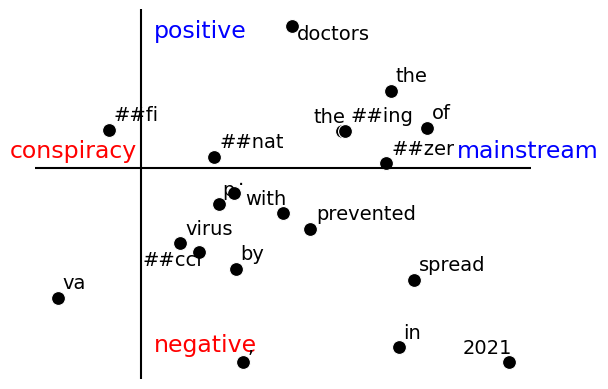

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

plt.rc('font', size=14)

ax = sns.scatterplot(x=pca1, y=pca2, s=100, color="black")

plt.axis('off')
plt.axhline(y=0, color='k')
plt.text(min(pca1.min()+0.04,-0.1),0.01,dimension_list[1], color="red", size=17)
plt.text(max(pca1.max()-0.04, 0.1),0.01,dimension_list[0], color="blue", size=17)
plt.axvline(x=0, color='k')
plt.text(0.01,min(pca2.min()+0.01,-0.1),dimension_list[3], color="red", size=17)
plt.text(0.01,max(pca2.max()-0.01,0.1),dimension_list[2], color="blue", size=17)
texts = []
for i, txt in enumerate(token_words):
    t = ax.annotate(txt, (pca1[i] + 0.003, pca2[i] + 0.003))
    texts.append(t)
adjust_text(texts)